# 4．推測統計の応用 ｜Pythonプログラミングを使った統計分析の基礎

### [Logics of Blue](https://logics-of-blue.com/) 馬場真哉：2019年3月1日

## 目的
- 母平均に関する区間推定や仮説検定の方法を学ぶ
    - 正規分布
    - t分布
    - 区間推定
    - 1変量のt検定
    - 平均値の差の検定（Welchの検定）

 
## 目次
1. [正規分布](#1．正規分布)
2. [t値とt分布](#2．t値とt分布)
1. [信頼区間の計算](#3．信頼区間の計算)
2. [1変量のt検定](#4．1変量のt検定)
3. [平均値の差の検定](#5．平均値の差の検定)


In [1]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 表示桁数の指定
%precision 3
# グラフをjupyter Notebook内に表示させるための指定
%matplotlib inline

# 不要なワーニングを出力させない
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

***
## 1．正規分布
<p>
    正規分布の成り立ちから説明を進めていきます。<br>
    正規分布を、シミュレーションを使って導出します。
</p>

In [2]:
# 標準的な魚の体長
hyojun_taityo = 10
hyojun_taityo

10

In [3]:
# 小さな誤差
noise = np.array([-0.01, 0.01])
noise

array([-0.01,  0.01])

In [4]:
# 小さな誤差を、ランダムに1000個作成
noise_1000 = np.random.choice(noise, 1000, replace = True)

# 結果の表示（毎回値が変わる）
print("ノイズの合計値        ", sp.sum(noise_1000))
print("標準体長にノイズを足す", hyojun_taityo + sp.sum(noise_1000))

ノイズの合計値         0.44
標準体長にノイズを足す 10.44


In [5]:
# 上記の操作を1万回繰り返す

# 乱数の種
np.random.seed(1)

# t値を格納する入れ物
taityo_array = np.zeros(10000)

# シミュレーションの実行
for i in range(0, 10000):
    noise_1000_tmp = np.random.choice(noise, 1000, replace=True)
    taityo_array[i] = hyojun_taityo + sp.sum(noise_1000_tmp)

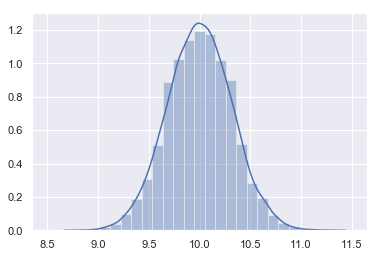

In [6]:
# ヒストグラム
kaikyuu = np.linspace(8.5, 11.5, 30)
sns.distplot(taityo_array, kaikyuu)

In [7]:
# 分散（理論上、ノイズの累積数（1000）×ノイズの大きさの絶対値の2乗（0.01×0.01＝0.0001）で計算されます）
sp.var(taityo_array, ddof = 0)

0.10008956476400002

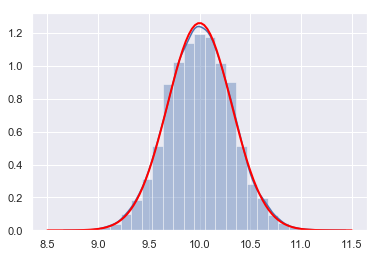

In [8]:
# 先ほどのシミュレーション結果は、
# 平均が10（標準体長）で、分散が0.1の正規分布とみなすことができる。

# ヒストグラム
kaikyuu = np.linspace(8.5, 11.5, 30)
sns.distplot(taityo_array, kaikyuu)

# 正規分布の確率密度関数の折れ線グラフ
# stats.norm.pdf(x, loc = 平均値, scale = 標準偏差)
x = np.linspace(8.5, 11.5, 100)
pdf_normal = stats.norm.pdf(x, loc = 10, scale = sp.sqrt(0.1))

# 確率密度関数の折れ線グラフ
plt.plot(x, pdf_normal, color = 'red', linewidth = 2)

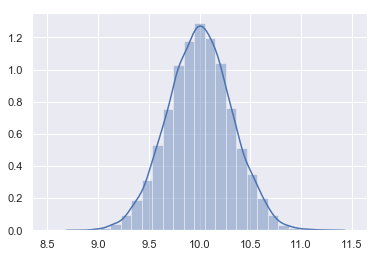

In [9]:
# 正規分布という確率分布を使えば、正規分布に従う確率変数を得るのは簡単
np.random.seed(1)
simulate_normal = stats.norm.rvs(size = 10000, loc = 10, scale = sp.sqrt(0.1))

# ヒストグラム
kaikyuu = np.linspace(8.5, 11.5, 30)
sns.distplot(simulate_normal, kaikyuu)

***
## 2．t値とt分布

### t値の計算例

In [10]:
# 平均10、分散0.1の正規分布に従う確率変数を20個取得
simulate_normal = stats.norm.rvs(size = 20, loc = 10, scale = sp.sqrt(0.1))
simulate_normal

array([ 9.961, 10.072,  9.889,  9.737,  9.917, 10.054, 10.213,  9.897,
        9.903, 10.166,  9.815,  9.928,  9.831,  9.747, 10.326,  9.791,
        9.985, 10.067,  9.801, 10.193])

In [11]:
# t値を計算
t_value = (sp.mean(simulate_normal) - 10) / stats.sem(simulate_normal)
t_value

-0.9451214507918771

### t値を何度も計算してt分布を得る

In [12]:
# 上記のt値の計算を1万回繰り返す

# 乱数の種
np.random.seed(1)

# t値を格納する入れ物
t_value_array = np.zeros(10000)

# シミュレーションの実行
for i in range(0, 10000):
    sample = stats.norm.rvs(size = 20, loc = 10, scale = sp.sqrt(0.1))
    t_value_array[i] = (sp.mean(sample) - 10) / stats.sem(sample)

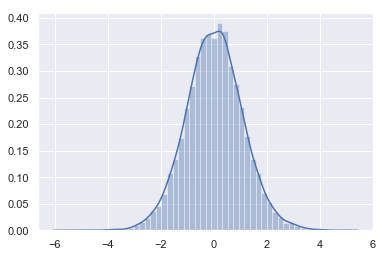

In [13]:
# t値のヒストグラム
# これがt分布
sns.distplot(t_value_array)

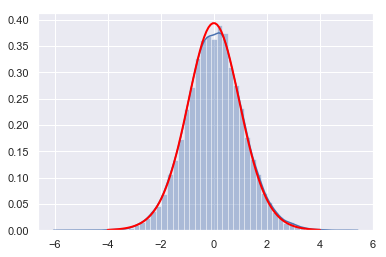

In [14]:
# 先ほどのシミュレーション結果は、
# 自由度が19のt分布とみなすことができる。

# ヒストグラム
sns.distplot(t_value_array)

# t分布の確率密度関数の折れ線グラフ
# stats.t.pdf(x, df = 自由度)
x = np.linspace(-4, 4, 100)
pdf_t = stats.t.pdf(x = x, df = 19)

# 確率質量関数の折れ線グラフ
plt.plot(x, pdf_t, color = 'red', linewidth = 2)

In [15]:
# 例えば、自由度が100のt分布における97.5%点は、以下のようにして計算できる
df = 100
t_975 = stats.t.ppf(q = 0.975, df = df)
t_975

1.9839715184496334

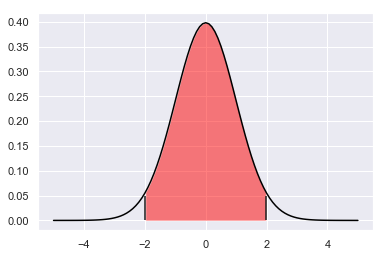

In [16]:
# 参考：スライドに載せたt分布のグラフと95%区間
x_plot = np.arange(start = -5, stop = 5.1, step = 0.1)
plt.plot(x_plot, stats.t.pdf(x = x_plot, df = df), 
         color = 'black')

# 縦棒を引く
plt.vlines(t_975, ymin = 0, ymax = 0.05)
plt.vlines(-t_975, ymin = 0, ymax = 0.05)

# 95%区間を赤く塗りつぶす
# 赤く塗りつぶされた面積は0.95となる
x = np.arange(start = -t_975, stop = t_975, step = 0.01)
y1 = stats.t.pdf(x = x, df = df)
plt.fill_between(x = x, y1 = y1, facecolor='red', alpha=0.5)

***
## 3．信頼区間の計算

### データの読み込みなど

In [17]:
# データの読み込み
fish_data = pd.read_csv("fish_length.csv")
fish_data.head()

,length,species
0,16.5,A
1,7.6,A
2,7.9,A
3,5.7,A
4,13.5,A


In [18]:
# 魚種別の集計
group = fish_data.groupby("species")
group.describe()

length                                                    
         count    mean       std  min     25%    50%     75%   max
species                                                           
A        100.0  10.240  3.555988  0.8   7.575  10.25  12.575  18.7
B        100.0  15.615  3.745067  5.3  13.800  15.95  18.000  25.1

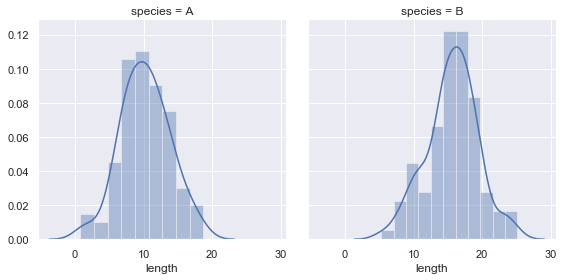

In [19]:
# 魚種別ヒストグラム
# speciesを対象に、グラフを2列に分ける。
g = sns.FacetGrid(fish_data,         # 対象データ
                  col = "species",   # speciesで列を分ける。rowなら行で分ける。
                  height = 4)        # グラフの大きさ

# lengthのヒストグラムを描く
g.map(sns.distplot, "length")

In [20]:
# 魚種別に体長データを分ける
fish_a = fish_data.query('species == "A"').length
fish_b = fish_data.query('species == "B"').length

### 信頼区間の計算

In [21]:
# 魚種Aの母平均の95%信頼区間を計算します。

# 標本平均
mean_a = sp.mean(fish_a)

# 標準誤差
se_a = stats.sem(fish_a)

# 自由度（サンプルサイズ－１）
df_a = len(fish_a) - 1

In [22]:
# 区間推定
interval = stats.t.interval(alpha = 0.95, df = df_a, loc = mean_a, scale = se_a)
interval

(9.53441483731931, 10.94558516268069)

### 参考：t分布を使って、信頼区間を計算

In [23]:
# 2.5%点
t_025 = stats.t.ppf(q = 0.025, df = df_a)

# 97.5%点
t_975 = stats.t.ppf(q = 0.975, df = df_a)

In [24]:
# 下側信頼限界
lower = mean_a + t_025 * se_a
lower

9.53441483731931

In [25]:
# 上側信頼限界
upper = mean_a + t_975 * se_a
upper

10.94558516268069

### 参考：95%信頼区間の「95%」の意味を確認する

In [26]:
# 仮に「母集団の平均値が10である」とわかっていたとする。
# この時、標本から計算された信頼区間が10を含んでいればOK
be_included_array = np.zeros(20000)
be_included_array

array([0., 0., 0., ..., 0., 0., 0.])

In [27]:
# 「サンプルサイズ20の標本を単純ランダムサンプリングによって得て、95%信頼区間を求める」試行を20000回繰り返す
# 信頼区間が母平均(10)を含んでいれば「be_included_array」を「1」にする

np.random.seed(1)
for i in range(0, 20000):
    sample = stats.norm.rvs(size = 20, loc = 10, scale = 10) # 標準偏差(scale)の値を変化させても結果は変わりません。母分散が未知でもOKです
    df = len(sample) - 1    # 自由度
    mu = sp.mean(sample)    # 平均値
    se = stats.sem(sample)  # 標準誤差
    interval = stats.t.interval(0.95, df, mu, se)  # 95%信頼区間
    if(interval[0] <= 10 and interval[1] >= 10):  # 95%信頼区間が10を含んでいれば、値を1にする
        be_included_array[i] = 1

In [28]:
# 母平均を含んでいる割合は95%
sum(be_included_array) / len(be_included_array)

0.9489

<p>
    これで区間推定の説明を終わります。ここで質問を受け付けます。
</p>

***
## 4．1変量のt検定

In [29]:
# t検定
# 魚種Aの体長の平均値は、10cmと異なると言えるか？
stats.ttest_1samp(fish_a, 10)

Ttest_1sampResult(statistic=0.6749179171410568, pvalue=0.5013011159884764)

### 参考：t分布を使って、p値を計算

In [30]:
# t値
t_value = (mean_a - 10) / se_a
t_value

0.6749179171410568

In [31]:
# p値
# cdf関数は「Cumulative density function.」の略です。
# Cumulativeは「累積的」という意味で、
# t値が0.67よりも大きくなる確率を全部足し合わせた（積分した）結果を返します。
alpha = stats.t.cdf(t_value, df = df_a)
(1 - alpha) * 2

0.5013011159884764

#### 参考：下記の赤い部分の面積を2倍したものがp値です

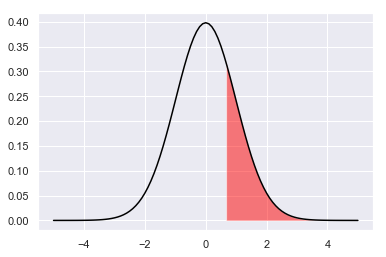

In [32]:
# t分布の確率密度関数
x_plot = np.arange(start = -5, stop = 5.1, step = 0.1)
plt.plot(x_plot, stats.t.pdf(x = x_plot, df = df_a), 
         color = 'black')

# t値が0.67を超える確率（面積
x = np.arange(start = 0.67, stop = 4, step = 0.1)
y1 = stats.t.pdf(x = x, df = df_a)
plt.fill_between(x = x, y1 = y1, facecolor='red', alpha=0.5)

***
## 5．平均値の差の検定

In [33]:
# 魚種Aの体長の平均値と、魚種Bの体長の平均値は異なると言えるか？
# equal_var = Falseは常に指定しておいてOKです
stats.ttest_ind(fish_a, fish_b, equal_var = False)

Ttest_indResult(statistic=-10.40787893514739, pvalue=1.6694540918935468e-20)

### 参考：t値の計算

Welchの検定をする場合は、t分布からp値を計算するのがやや難しいので、p値の計算は省略して、t値のみを計算することにします

In [34]:
mean_a = sp.mean(fish_a)
mean_b = sp.mean(fish_b)

var_a = sp.var(fish_a, ddof = 1)
var_b = sp.var(fish_b, ddof = 1)

size_a = len(fish_a)
size_b = len(fish_b)

t_value = (mean_a - mean_b) / sp.sqrt((var_a/size_a) + (var_b/size_b))
t_value

-10.407878935147389